# HOUSING: PRICE PREDICTION

# Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. 

For this company wants to know:
- Which variables are important to predict the price of variable?
- How do these variables describe the price of the house?

# Business goal
We are required to model **the price of houses** with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

# Problem Description

Size of training set: 1168 records

Size of test set: 292 records

# Importing and Loading Dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the training data for analysis
df_train = pd.read_csv('housing train.csv')
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


# Data Description

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)








# Basic Statistics of Our DataSet

In [3]:
#Basic Info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [4]:
#column names
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#datatypes of the Attributes
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
#No of rows and columns
df_train.shape

(1168, 81)

###### Summary on the Basic Statistics:
- There are 1168 rows and 81 columns in dataframe
- These 81 columns comprises of both dimensions (categorical value) and measures (numeric value)
- The dataset is not clean, i.e. consists of missing values as well

# Cleaning Dataset

## checking for any duplicates

In [7]:
#1st cheacking for any duplicate values in dataset
#dropping duplicate column,if exists
df_train= df_train.drop_duplicates()
print(f'\nShape of dataframe:\n{df_train.shape}')
df_train.head()


Shape of dataframe:
(1168, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


###### Observation:
 - we find no duplicate values in any of the column.

## Unique values

In [8]:
#finding the unique values
#using for loop
for column in df_train.columns:
    print("Title:",column)
    print("unique values are:",df_train[column].unique())
    print("**"*10)
    print("\n")

Title: Id
unique values are: [127 889 793 ... 196  31 617]
********************


Title: MSSubClass
unique values are: [120  20  60  50  70  30 160  85  45  90  40  80 190  75 180]
********************


Title: MSZoning
unique values are: ['RL' 'RM' 'FV' 'RH' 'C (all)']
********************


Title: LotFrontage
unique values are: [ nan  95.  92. 105.  58.  88.  70.  80.  50.  44. 129.  59.  55.  64.
  24.  68.  71.  74.  61.  60. 120.  84. 141.  30.  65.  76. 100.  85.
  75. 107. 122.  82.  62.  73.  79.  77.  41.  69.  90.  96.  72.  34.
  78.  63.  40.  98. 160. 108. 128.  51.  81.  99.  66.  37. 174.  87.
  53. 152.  47.  86.  56.  89.  35.  52.  21. 104.  57.  83.  46. 101.
 112. 149.  93.  49.  43. 130.  54.  91.  67.  97. 110. 103. 115.  94.
  48.  36. 313. 109. 144. 121. 102. 116. 182.  32.  42. 168. 118.  38.
 140. 134. 114. 124.  39. 111.  45. 106. 153.]
********************


Title: LotArea
unique values are: [  4928  15865   9920  11751  16635  14054  11341  13125   9170   8

###### Observation on value counts:
   - From the obseravtion the column **Utilities** have only one value throughout the column
   - so dropping of the column **Utilities** recommended

In [9]:
#column Utilities have only one value throughout the column
#Dropping of column Utilities
df_train=df_train.drop("Utilities",axis=1)
df_train.shape

(1168, 80)

In [10]:
# Removing identifier field
df_train.drop(['Id'], axis=1, inplace=True)

# Finding Missing Values

In [11]:
df_train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 79, dtype: int64

<AxesSubplot:>

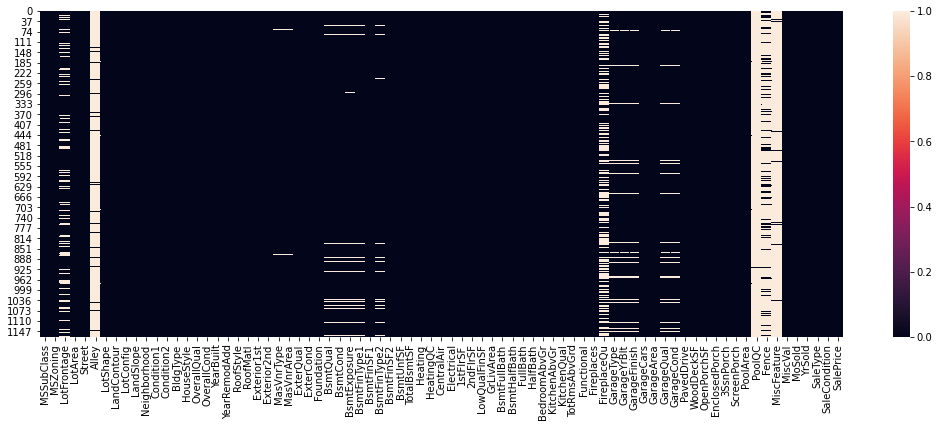

In [12]:
#Graphical Visuvalization of Missing values
plt.figure(figsize=(18,6))
sns.heatmap(df_train.isnull())

###### Observation:
The following list contains the column name with missing values
- LotFrontage
- Alley
- MasVnrType
- MasVnrArea
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- FireplaceQu
- GarageType
- GarageYrBlt
- GarageFinish
- GarageCond
- PoolQC
- Fence
- MiscFeature

In [13]:
#calculating Percentage of the missing columns
print(((df_train.isnull().sum()/df_train.shape[0])*100).round(2))

MSSubClass        0.00
MSZoning          0.00
LotFrontage      18.32
LotArea           0.00
Street            0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 79, dtype: float64


###### Observation:
Columns with more than 40% of missing values
- Alley
- FireplaceQu
- PoolQC
- Fence
- MiscFeature


columns with less than 40% of missing values
- LotFrontage
- MasVnrType
- MasVnrArea
- BsmtQual
- BsmtCond      
- BsmtExposure  
- BsmtFinType1   
- BsmtFinType2   
- Electrical     
- GarageType    
- GarageYrBlt    
- GarageFinish   
- GarageQual    
- GarageCond     

### Summary
- It is very important to not loss too much data.
- But still filling the NaN values with mean or median or mode may result in high bias if we train ML algorithms especially when the column has high percentage of missing values.
- Using mean value for replacing missing values may not create a great model and hence gets ruled out.
-  As a rule of thumb, when the data goes missing on 40 percent of the variable and above, dropping the variable should be considered.
- so it is better to drop columns having high percentage of NaN values and fill the remaining missing columns with mean or mode values.

In [14]:
#Dropping columns with more than 40% missing values
df_train=df_train.drop("Alley",axis=1)            #93.77% NaN
df_train=df_train.drop("FireplaceQu",axis=1)      #47.26% NaN
df_train=df_train.drop("PoolQC",axis=1)           #99.52% NaN
df_train=df_train.drop("Fence",axis=1)            #80.75% NaN
df_train=df_train.drop("MiscFeature",axis=1)      #80.75% NaN
df_train=df_train.drop("LotFrontage",axis=1)


# Data Imputing

In [15]:
# Analysing columns which still have NaN values
print(df_train['MasVnrType'].describe(), end='\n\n')      # 0.55% NaN
print(df_train['MasVnrArea'].describe(), end='\n\n')      # 0.55% NaN
print(df_train['BsmtQual'].describe(), end='\n\n')        # 2.53% NaN
print(df_train['BsmtCond'].describe(), end='\n\n')        # 2.53% NaN
print(df_train['BsmtExposure'].describe(), end='\n\n')    # 2.60% NaN
print(df_train['BsmtFinType1'].describe(), end='\n\n')    # 2.53% NaN
print(df_train['BsmtFinType2'].describe(), end='\n\n')    # 2.60% NaN
print(df_train['GarageType'].describe(), end='\n\n')      # 5.55% NaN
print(df_train['GarageYrBlt'].describe(), end='\n\n')     # 5.55% NaN
print(df_train['GarageFinish'].describe(), end='\n\n')    # 5.55% NaN
print(df_train['GarageQual'].describe(), end='\n\n')      # 5.55% NaN
print(df_train['GarageCond'].describe(), end='\n\n')      # 5.55% NaN

count     1161
unique       4
top       None
freq       696
Name: MasVnrType, dtype: object

count    1161.000000
mean      102.310078
std       182.595606
min         0.000000
25%         0.000000
50%         0.000000
75%       160.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

count     1138
unique       4
top         TA
freq       517
Name: BsmtQual, dtype: object

count     1138
unique       4
top         TA
freq      1041
Name: BsmtCond, dtype: object

count     1137
unique       4
top         No
freq       756
Name: BsmtExposure, dtype: object

count     1138
unique       6
top        Unf
freq       345
Name: BsmtFinType1, dtype: object

count     1137
unique       6
top        Unf
freq      1002
Name: BsmtFinType2, dtype: object

count       1104
unique         6
top       Attchd
freq         691
Name: GarageType, dtype: object

count    1104.000000
mean     1978.193841
std        24.890704
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      20

In [16]:
# Dropping missing values from other columns
df_train.dropna(axis="rows",inplace=True)

In [17]:
df_train.shape

(1071, 73)

### Rechecking for any missing values

In [18]:
df_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 73, dtype: int64

<AxesSubplot:>

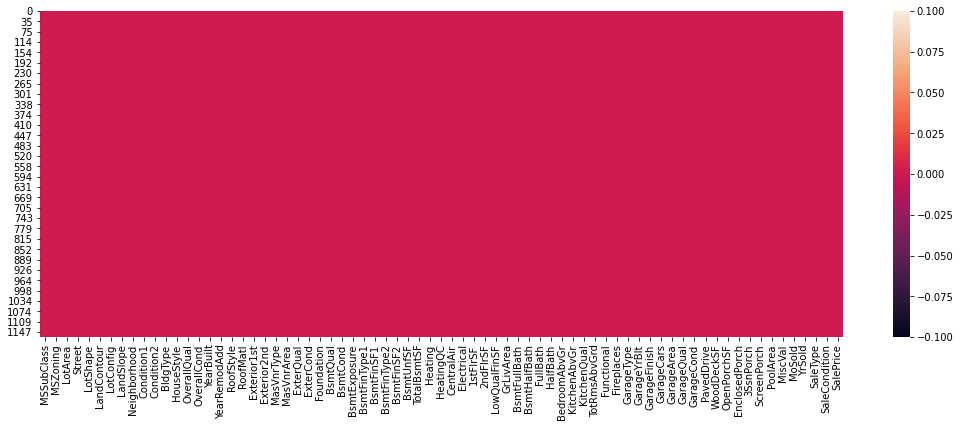

In [19]:
#Graphical Visuvalization of Missing values
plt.figure(figsize=(18,6))
sns.heatmap(df_train.isnull())

### Summary
Once the data cleaning is done we proceed with EDA

In [20]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
   

In [21]:
df_train.shape

(1071, 73)

# EDA

In [22]:
#identify numerical and non-numerical columns automatically
# Separating numerical and non-numerical fields for analysisng them separately using the provided Data Dictionary.
catcols = []
numcols = []

for col in list(df_train):
    if df_train[col].dtypes == 'object':
        catcols.append(col)  
    else:
        numcols.append(col)
print('object type columns:\n',catcols)

print('\nNumerical columns:\n',numcols)

print("\nlength of object type columns",len(catcols))

print("length of numerical columns",len(numcols))

object type columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

Numerical columns:
 ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Pool

## univariate analysis - Target variable

In [23]:
df_train["SalePrice"]

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1162     58500
1163    122000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1071, dtype: int64

In [24]:
#description about column SalesPrice
df_train["SalePrice"].describe()

count      1071.000000
mean     187212.879552
std       78367.298698
min       35311.000000
25%      135000.000000
50%      169500.000000
75%      222000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

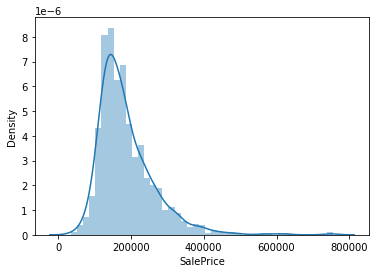

In [25]:
#Let's visualize the distribution of sale price
sns.distplot(df_train['SalePrice'])

###### summary on target variable:
   1) No missing values
    
   2) Here we find that the mean is higher than median in most of the columns

If the mean is higher than the median, the distribution is positively skewed.

   3) the maximum and the 75% have huge range of difference.we observe that the difference is abnormal

we infer that we may have very less outliers or May be not. 

   4) From displacement Graph we infer that the sale price of most of the houses were around **200000**.
   
   5) The dispalcement graph shows the target variable is skewed

## Univariate Analysis - Categorical Features

 As we have many columns ,so let's make groups .
 
 There are several factors that affect house prices. Here we will divide these factors into **three main groups** there are 

- **Location**
- **physical condition** 
- **Sales Type and condition**


# i) Location


###### Location is an important factor in shaping the price of a house. This is because the location determines the prevailing land price 

Text(0.5, 1.0, 'Slope of property')

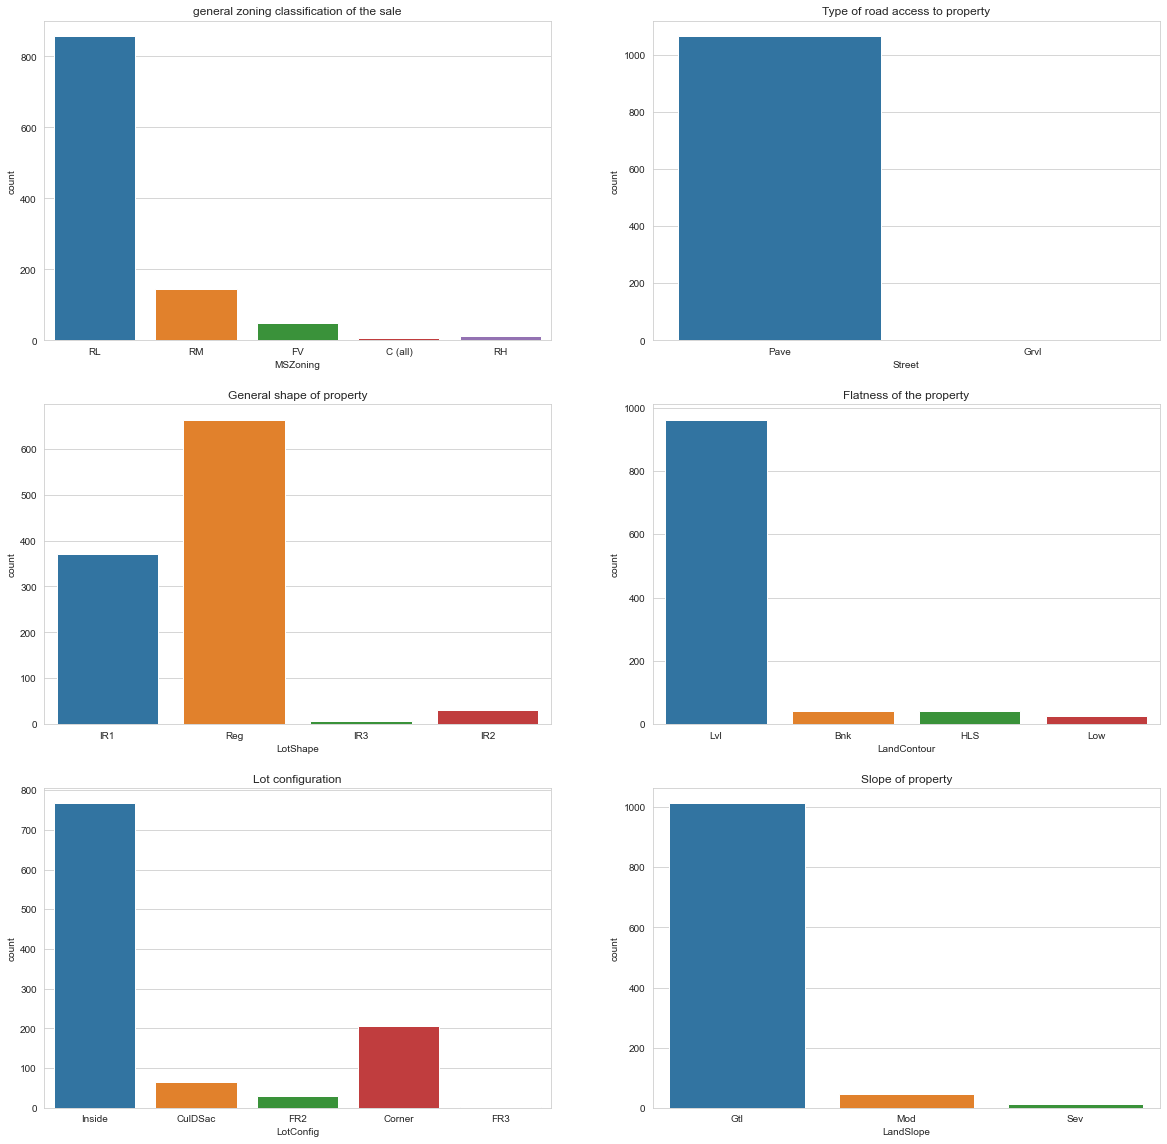

In [26]:
#Analysing columns related to Location
#using count plot
plt.figure(figsize=(20,20))
sns.set_style("whitegrid")
plt.subplot(3,2,1)
sns.countplot(df_train["MSZoning"]).set_title("general zoning classification of the sale")
plt.subplot(3,2,2)
sns.countplot(df_train["Street"]).set_title("Type of road access to property")
plt.subplot(3,2,3)
sns.countplot(df_train["LotShape"]).set_title("General shape of property")
plt.subplot(3,2,4)
sns.countplot(df_train["LandContour"]).set_title("Flatness of the property")
plt.subplot(3,2,5)
sns.countplot(df_train["LotConfig"]).set_title("Lot configuration")
plt.subplot(3,2,6)
sns.countplot(df_train["LandSlope"]).set_title("Slope of property")

###### Observation:
   - More number of houses were found with low residential density
   - There were around 1068 houses with paved road access whereas only 3 houses with Gravel road access
   - Large number of houses where seen to have regular shape and only very few with irregular shape
   - Regarding flatness of the property we notice houses around 950 in numbers were near flat/level followed by houses with quick and significant rise from street grade to building.
   - Houses with Inside lot configuration where found high in numbers
   - Mostly houses where found in Gentle slopes,followed by Moderate and severe slope

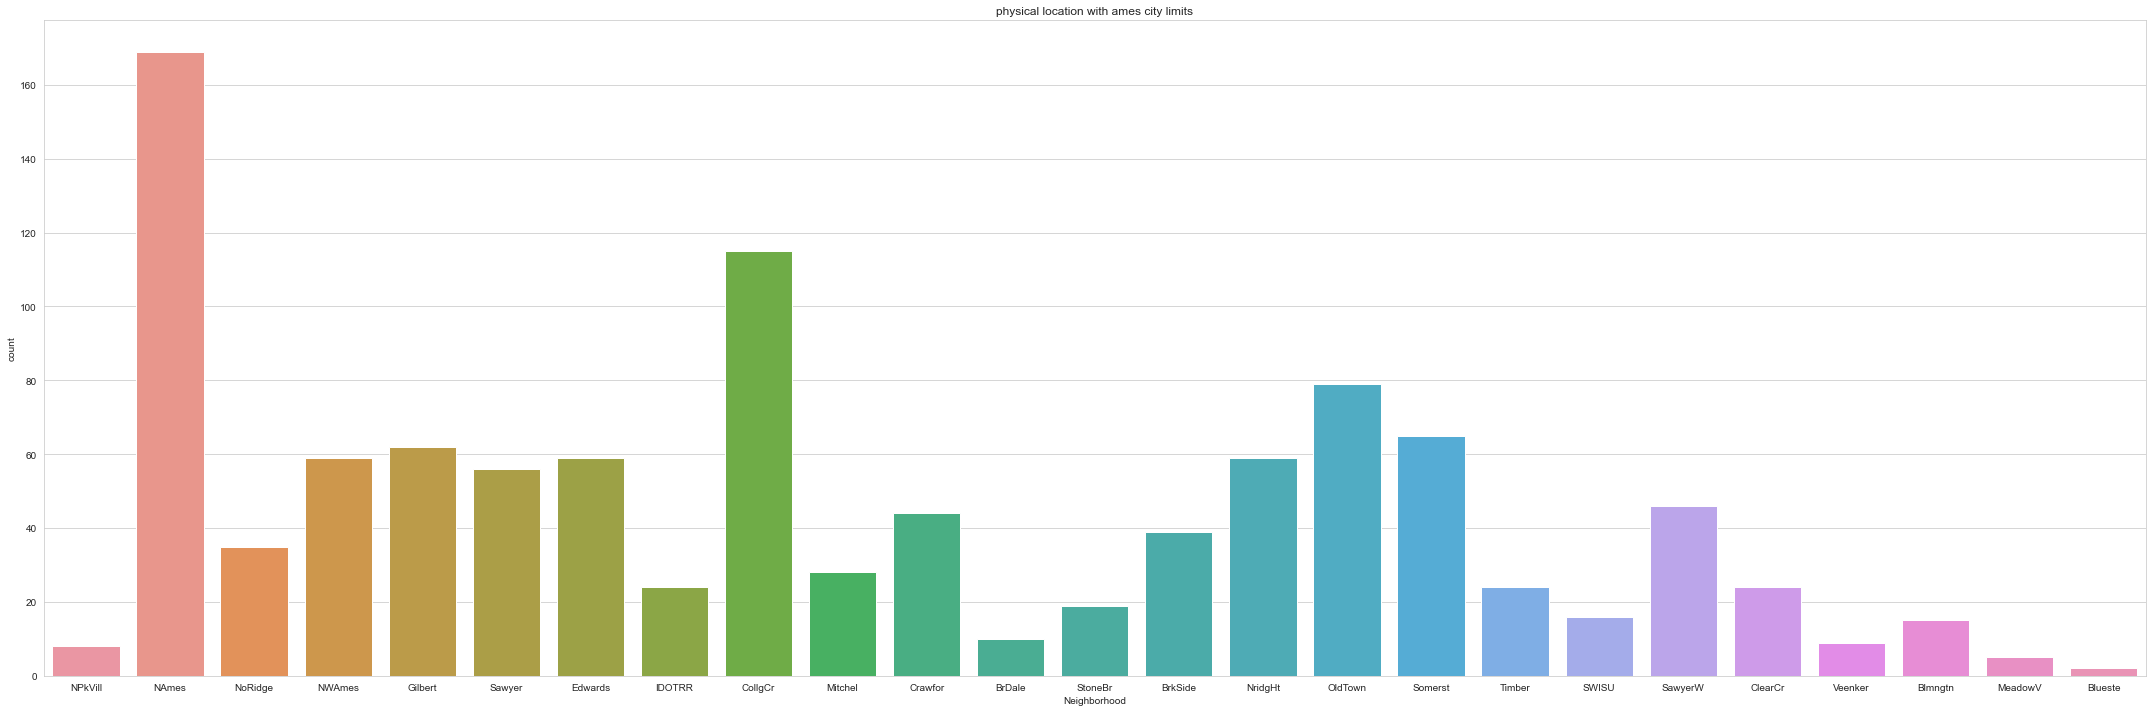

In [27]:
#countplot on column neighbourhood
plt.figure(figsize=(30,10))
sns.countplot(df_train["Neighborhood"]).set_title("physical location with ames city limits")
plt.tight_layout()

###### Observation:
   - Considering physical location with ames city limits we see more houses were found in **north ames**[NAmes]
   - Least number of houses found in the location of Bluestem of ames city

# ii) Physical conditions

###### Physical conditions are properties possessed by a house that can be observed by human senses.

Text(0.5, 1.0, 'Electrical system')

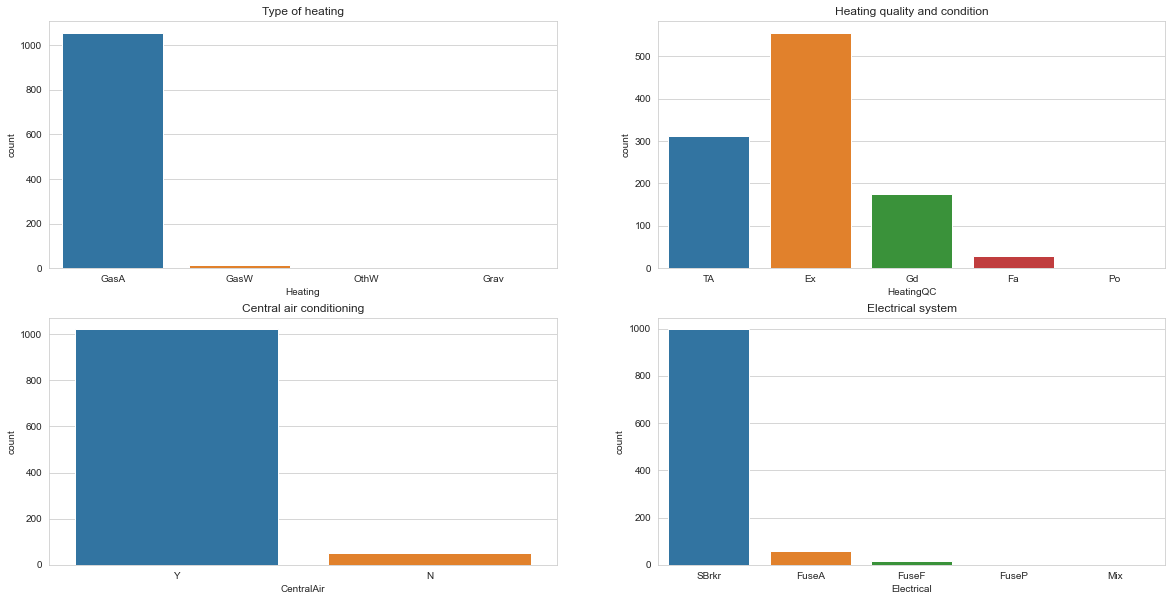

In [28]:
#Analysing column related to Physical condition of the property
#using count plot
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
plt.subplot(2,2,1)
sns.countplot(df_train["Heating"]).set_title("Type of heating")
plt.subplot(2,2,2)
sns.countplot(df_train["HeatingQC"]).set_title("Heating quality and condition")
plt.subplot(2,2,3)
sns.countplot(df_train["CentralAir"]).set_title("Central air conditioning")
plt.subplot(2,2,4)
sns.countplot(df_train["Electrical"]).set_title("Electrical system")


###### Observation:
- Gas forced warm air furnace heating sysytem is found in most of the houses
- There were more number of houses with excellent Heating quality and condition
- Almost all houses is fitted with Central air conditioning system
- Around 1000 houses is fitted with  Standard Circuit Breakers & Romex as the electrical system

# Garage 

Text(0.5, 1.0, 'Garage condition')

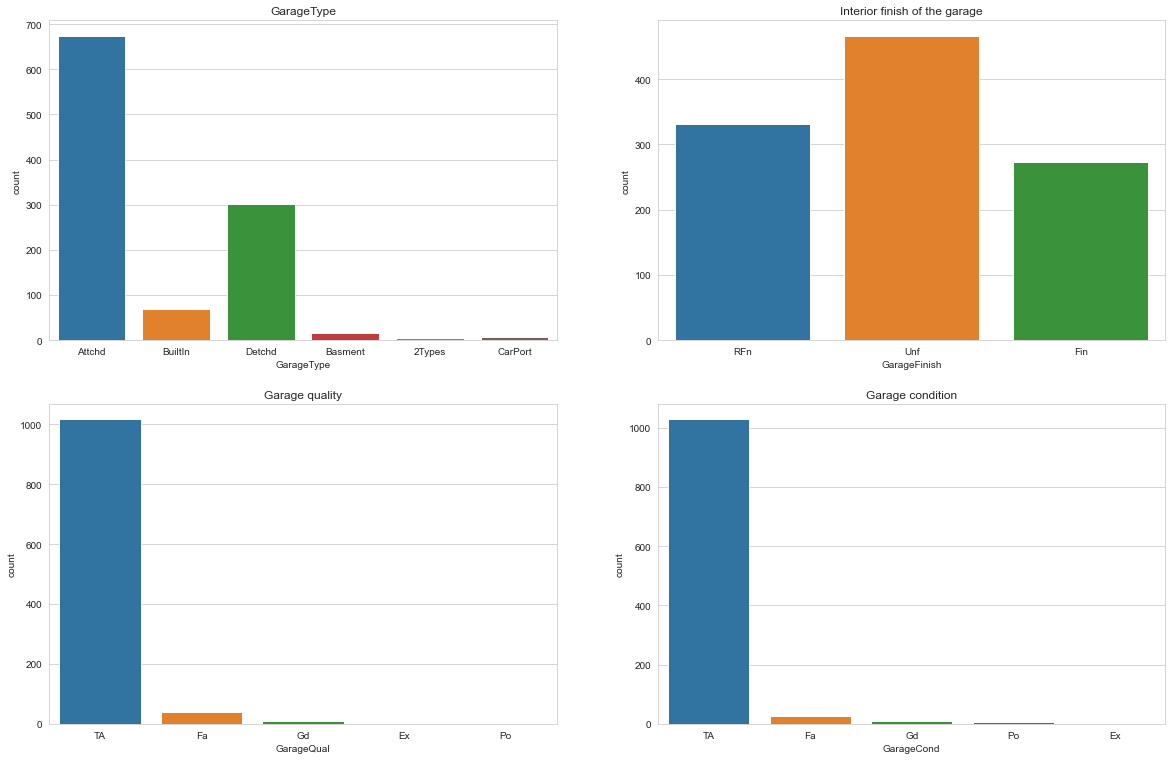

In [29]:
plt.figure(figsize=(20,20))
sns.set_style("whitegrid")
plt.subplot(3,2,1)
sns.countplot(df_train["GarageType"]).set_title("GarageType")
plt.subplot(3,2,2)
sns.countplot(df_train["GarageFinish"]).set_title("Interior finish of the garage")
plt.subplot(3,2,3)
sns.countplot(df_train["GarageQual"]).set_title("Garage quality")
plt.subplot(3,2,4)
sns.countplot(df_train["GarageCond"]).set_title("Garage condition")

###### Observation:
- We can see most of the houses were attached with garage 
- Regarding the interior finish of the garage, we can see only 280 garages were in finished condition. Around 480 garages were still unfinished,followed by roughly finished garages(around 320 in numbers).
- Many garages were seen with average/typical garage quality 
- similarly we can see the condition of most of the garages were in average/typical condition 

### iii) Sales Type and condition

In [30]:
#non-graphical representation
print("sale type",df_train["SaleType"].value_counts())
print("\nSale Condition",df_train["SaleCondition"].value_counts())

sale type WD       913
New      102
COD       37
ConLD      6
ConLI      4
ConLw      3
CWD        3
Con        2
Oth        1
Name: SaleType, dtype: int64

Sale Condition Normal     874
Partial    104
Abnorml     67
Family      18
Alloca       7
AdjLand      1
Name: SaleCondition, dtype: int64


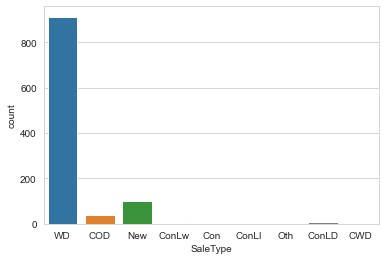

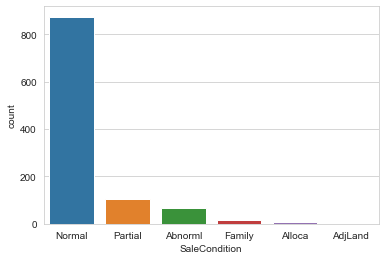

In [31]:
#graphical representation
sns.countplot(df_train["SaleType"],data=df_train)
plt.show()
sns.countplot(df_train["SaleCondition"],data=df_train)
plt.show()


###### Observation:
   - Warranty deed acts as a guarantee to the buyer where the seller has all the right to sell the property, and also the property is free from debts and other liabilities,despite the warranty deed. The graph shows most of the properties where Warranty Deed in **Conventional way**
   - Regarding sales condition,Normal condition where high when considering others

## Univariate Analysis - Numerical features

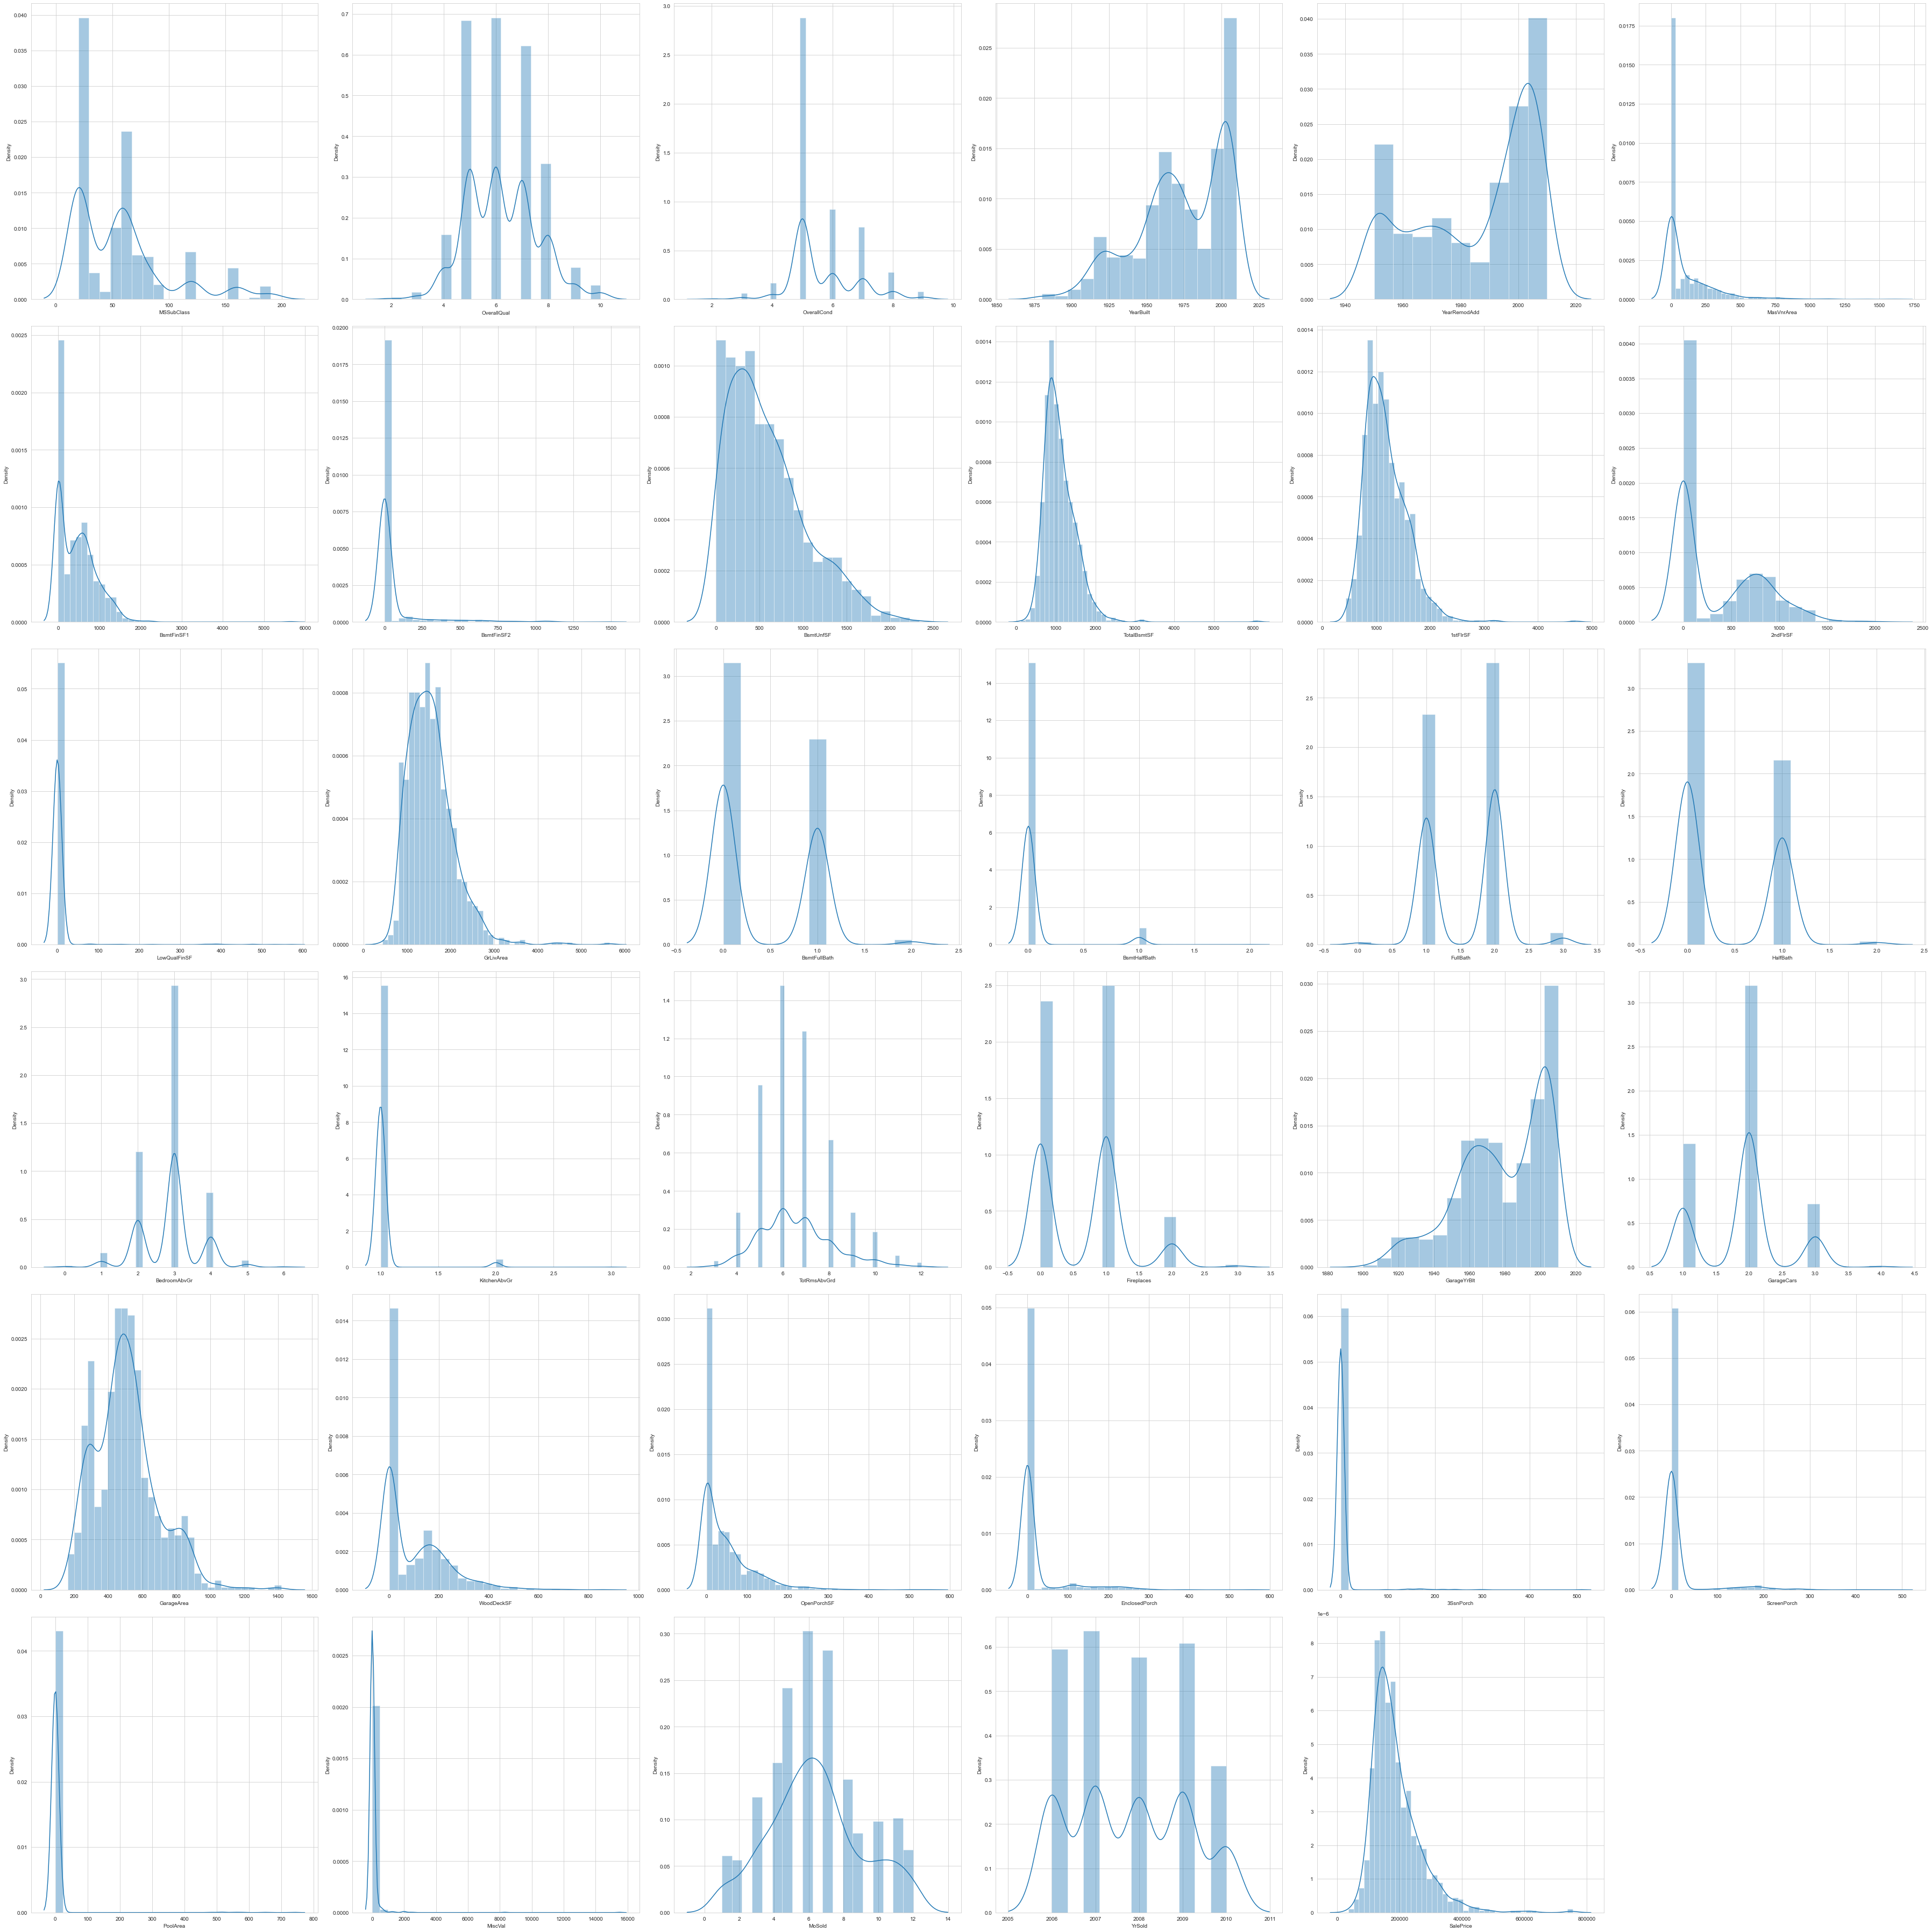

In [32]:
collist=['MSSubClass','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
ncol=6
nrow=6
plt.figure(figsize=(50,50))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df_train[collist[i]])
    plt.tight_layout()

## Bivariate Analysis

<AxesSubplot:xlabel='SalePrice', ylabel='BsmtFinSF2'>

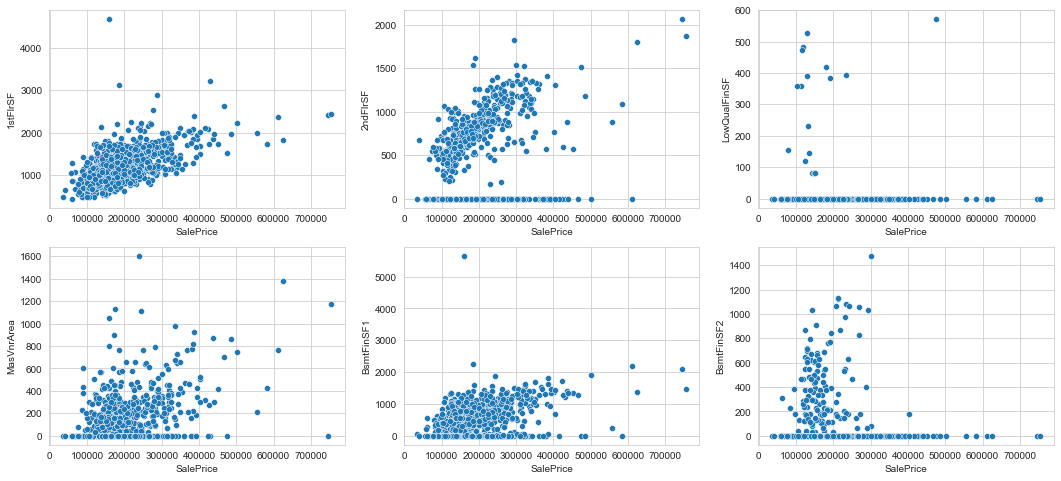

In [33]:
#Let's see effect of other attributes on SalePrice

plt.figure(figsize=(18, 8))
plt.subplot(2,3,1)
#SalePrice vs 1stFlrSF 
sns.scatterplot(y = '1stFlrSF', x ='SalePrice', data = df_train)
plt.subplot(2,3,2)
#SalePrice vs 2ndFlrSF 
sns.scatterplot(y = '2ndFlrSF', x = 'SalePrice', data = df_train)
plt.subplot(2,3,3)
#SalePrice vs LowQualFinSF 
sns.scatterplot(y = 'LowQualFinSF', x = 'SalePrice', data = df_train)
plt.subplot(2,3,4)
#SalePrice vs MasVnrArea 
sns.scatterplot(y = 'MasVnrArea', x ='SalePrice', data = df_train)
plt.subplot(2,3,5)
#SalePrice vs BsmtFinSF1 
sns.scatterplot(y = 'BsmtFinSF1', x = 'SalePrice', data = df_train)
plt.subplot(2,3,6)
#SalePrice vs BsmtFinSF2 
sns.scatterplot(y = 'BsmtFinSF2', x = 'SalePrice', data = df_train)

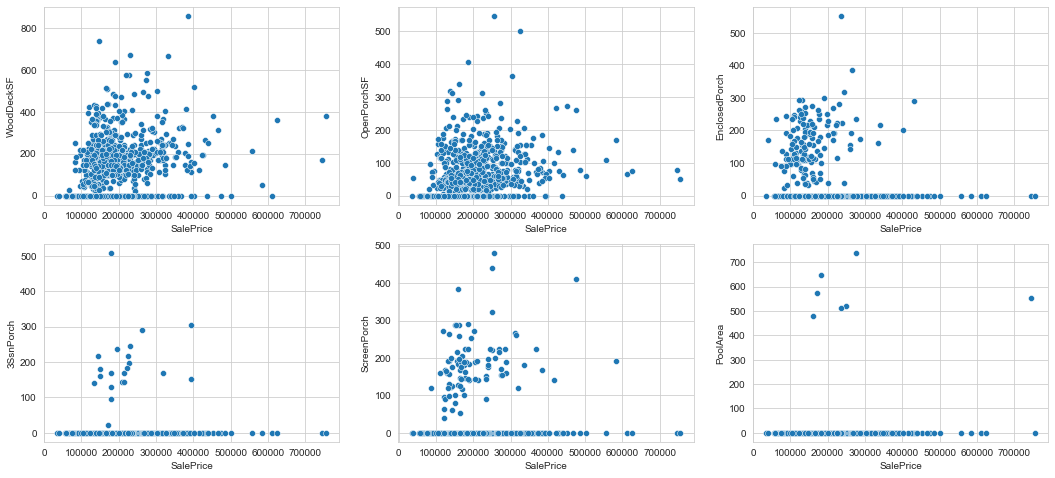

In [34]:
plt.figure(figsize=(18, 8))
plt.subplot(2,3,1)
#SalePrice vs WoodDeckSF
sns.scatterplot(y = 'WoodDeckSF', x ='SalePrice', data = df_train)
plt.subplot(2,3,2)
#SalePrice vs OpenPorchSF
sns.scatterplot(y = 'OpenPorchSF', x = 'SalePrice', data = df_train)
plt.subplot(2,3,3)
#SalePrice vs EnclosedPorch
sns.scatterplot(y = 'EnclosedPorch', x = 'SalePrice', data = df_train)
plt.subplot(2,3,4)
#SalePrice vs 3SsnPorch
sns.scatterplot(y = '3SsnPorch', x = 'SalePrice', data = df_train)
plt.subplot(2,3,5)
#SalePrice vs ScreenPorch
sns.scatterplot(y = 'ScreenPorch', x = 'SalePrice', data = df_train)
plt.subplot(2,3,6)
#SalePrice vs PoolArea
sns.scatterplot(y = 'PoolArea', x = 'SalePrice', data = df_train)
plt.show()

###### Observation:
   - From the scatterplot we understand that , with increase in each square feet the sale price of the property increases.

# Categorical encoding using Label-Encoder

In [35]:
#From the given data-set we can infer that all the data types are categorical
#we convert them to integer type by using the label encoder method
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['MSZoning'] = le.fit_transform(df_train['MSZoning'])
df_train['Street'] = le.fit_transform(df_train['Street'])
df_train['LotShape'] = le.fit_transform(df_train['LotShape'])
df_train['LandContour'] = le.fit_transform(df_train['LandContour'])
df_train['LotConfig'] = le.fit_transform(df_train['LotConfig'])
df_train['LandSlope'] = le.fit_transform(df_train['LandSlope'])
df_train['Neighborhood'] = le.fit_transform(df_train['Neighborhood'])
df_train['Condition1'] = le.fit_transform(df_train['Condition1'])
df_train['Condition2'] = le.fit_transform(df_train['Condition2'])
df_train['BldgType'] = le.fit_transform(df_train['BldgType'])
df_train['HouseStyle'] = le.fit_transform(df_train['HouseStyle'])
df_train['RoofStyle'] = le.fit_transform(df_train['RoofStyle'])
df_train['RoofMatl'] = le.fit_transform(df_train['RoofMatl'])
df_train['Exterior1st'] = le.fit_transform(df_train['Exterior1st'])
df_train['MasVnrType'] = le.fit_transform(df_train['MasVnrType'])
df_train['ExterQual'] = le.fit_transform(df_train['ExterQual'])
df_train['ExterCond'] = le.fit_transform(df_train['ExterCond'])
df_train['Foundation'] = le.fit_transform(df_train['Foundation'])
df_train['BsmtQual'] = le.fit_transform(df_train['BsmtQual'])
df_train['BsmtCond'] = le.fit_transform(df_train['BsmtCond'])
df_train['BsmtExposure'] = le.fit_transform(df_train['BsmtExposure'])
df_train['BsmtFinType1'] = le.fit_transform(df_train['BsmtFinType1'])
df_train['BsmtFinType2'] = le.fit_transform(df_train['BsmtFinType2'])
df_train['Heating'] = le.fit_transform(df_train['Heating'])
df_train['HeatingQC'] = le.fit_transform(df_train['HeatingQC'])
df_train['CentralAir'] = le.fit_transform(df_train['CentralAir'])
df_train['Electrical'] = le.fit_transform(df_train['Electrical'])
df_train['KitchenQual'] = le.fit_transform(df_train['KitchenQual'])
df_train['Functional'] = le.fit_transform(df_train['Functional'])
df_train['GarageType'] = le.fit_transform(df_train['GarageType'])
df_train['GarageFinish'] = le.fit_transform(df_train['GarageFinish'])
df_train['GarageQual'] = le.fit_transform(df_train['GarageQual'])
df_train['GarageCond'] = le.fit_transform(df_train['GarageCond'])
df_train['PavedDrive'] = le.fit_transform(df_train['PavedDrive'])
df_train['SaleType'] = le.fit_transform(df_train['SaleType'])
df_train['SaleCondition'] = le.fit_transform(df_train['SaleCondition'])
df_train["Exterior2nd"] = le.fit_transform(df_train['Exterior2nd'])

# Feature Engineering
- Before moving further in this section first let's find the correlation between the features using Heatmap.

In [36]:
#correlation
cor=df_train.corr()
cor

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,-0.005511,-0.115761,-0.031220,0.084070,-0.010900,0.065829,0.002382,0.001127,-0.045356,...,-0.014527,-0.039484,-0.008544,0.011890,-0.021331,-0.014620,-0.035668,0.032489,-0.007827,-0.054555
MSZoning,-0.005511,1.000000,-0.016779,0.171400,0.050178,-0.011974,-0.037022,-0.026520,-0.255917,-0.031700,...,0.144257,0.004626,0.032204,-0.001925,0.003553,-0.016331,-0.003116,0.068876,-0.012812,-0.135675
LotArea,-0.115761,-0.016779,1.000000,-0.304400,-0.186571,-0.182142,-0.150527,0.419922,0.006273,0.024139,...,-0.006864,0.024833,0.019882,0.096589,0.051584,0.009459,-0.034533,0.009118,0.030072,0.237975
Street,-0.031220,0.171400,-0.304400,1.000000,-0.003725,0.136471,0.010280,-0.174423,-0.012183,0.003324,...,0.018770,0.006746,0.015182,0.004254,-0.036443,-0.018793,-0.034727,0.035887,0.024137,0.044137
LotShape,0.084070,0.050178,-0.186571,-0.003725,1.000000,0.094665,0.207492,-0.097285,-0.042327,-0.138236,...,0.072130,-0.017668,-0.052380,-0.020826,-0.045223,-0.053973,0.018477,-0.019851,-0.042849,-0.245973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.014620,-0.016331,0.009459,-0.018793,-0.053973,-0.030110,0.021008,0.048440,0.001523,-0.003157,...,-0.028177,0.020545,0.030437,-0.041710,-0.010462,1.000000,-0.141932,-0.052570,0.008116,0.055175
YrSold,-0.035668,-0.003116,-0.034533,-0.034727,0.018477,0.011171,-0.014849,-0.005000,0.028126,-0.008543,...,-0.003308,0.019487,0.019774,-0.068690,-0.008366,-0.141932,1.000000,0.023752,0.016450,-0.040088
SaleType,0.032489,0.068876,0.009118,0.035887,-0.019851,-0.034814,-0.012926,0.055656,-0.021382,-0.003804,...,-0.005385,-0.014885,0.013794,0.015167,0.015811,-0.052570,0.023752,1.000000,0.169735,-0.038153
SaleCondition,-0.007827,-0.012812,0.030072,0.024137,-0.042849,0.027952,0.051093,-0.084545,0.034899,0.052613,...,-0.108557,-0.005318,-0.009360,-0.085226,0.008769,0.008116,0.016450,0.169735,1.000000,0.199806


<AxesSubplot:>

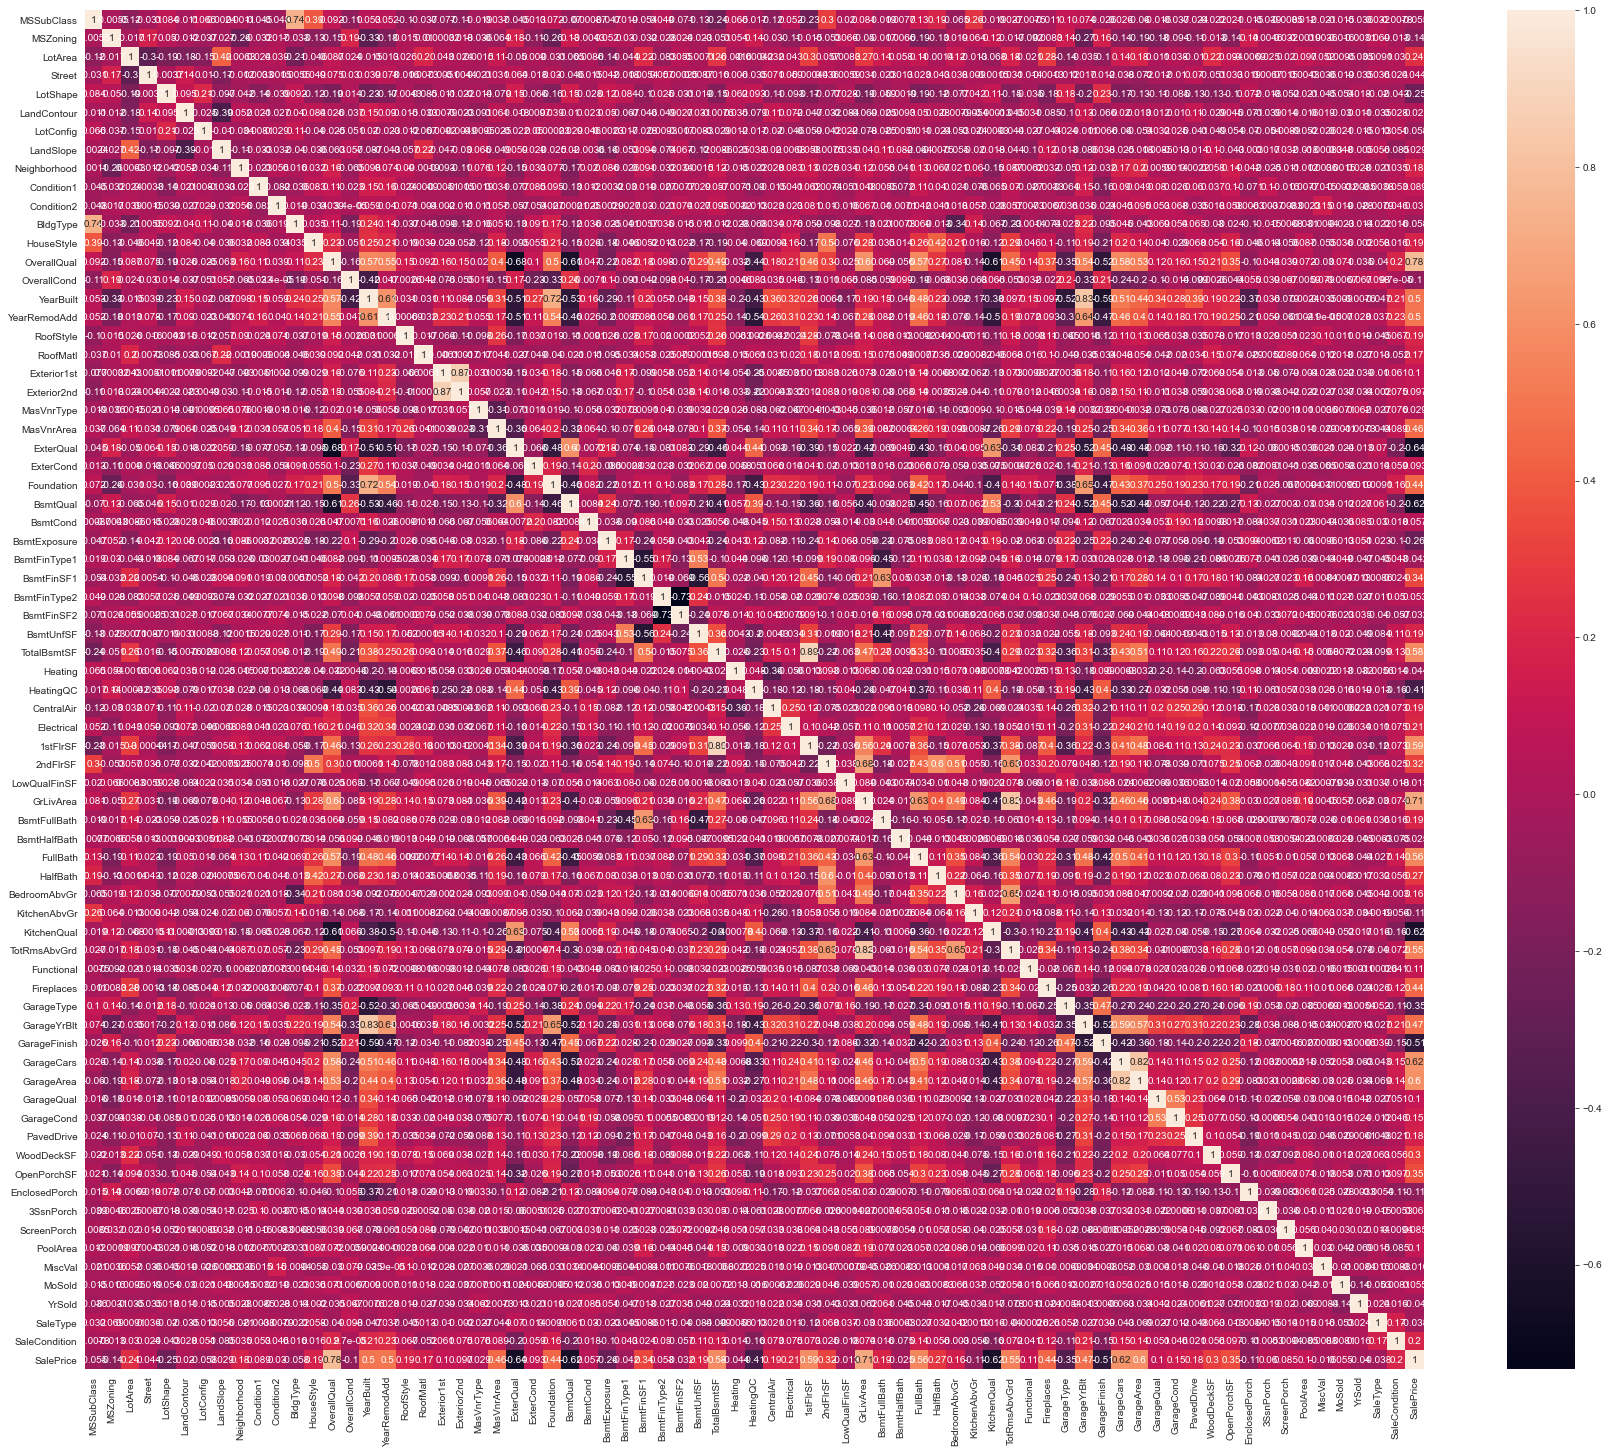

In [37]:
#Visualization of Correlation
#usind Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,25))
sns.heatmap((cor),annot=True)


###### Observation:
   - Because the number of features is so huge, heatmap is not clearly visible and difficult to draw a conclusion.
   - So let's try someting different. 

Text(0.5, 1.0, 'correlation with Target Variable')

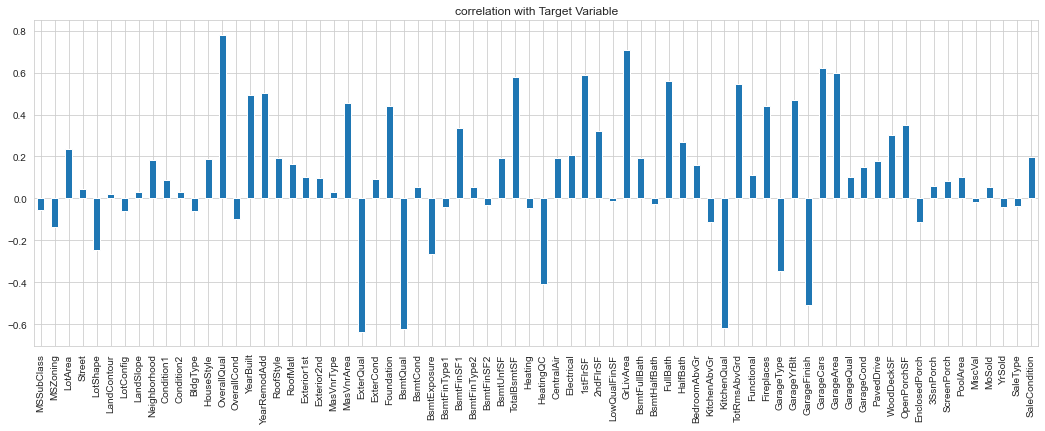

In [38]:
#correlation with Target
plt.figure(figsize=(18,6))
df_train.drop("SalePrice",axis=1).corrwith(df_train["SalePrice"]).plot(kind="bar",grid=True)
plt.xticks(rotation="vertical")
plt.title("correlation with Target Variable")


## Observation
from the above result it is clear that some columns making positive correlation while some has negative correlation to the target variable 

columns making negative correlation with the target

 - MSZoning
 - LotShape
 - LotConfig
 - BldgType
 - OverallCond
 - ExterQual
 - BsmtQual
 - BsmtExposure
 - BsmtFinType1
 - BsmtFinSF2
 - Heating
 - HeatingQC
 - LowQualFinSF
 - KitchenAbvGr
 - KitchenQual
 - GarageType
 - GarageFinish
 - EnclosedPorch 
 - MiscVal
 - YrSold
 - SaleType
       


from the observation we can say that the columns which are negatively correlated to the target is not going to help much in our prediction so droping of these columns is recommended 


### Remove unnecessary columns which are redundant that does not contribute to the model prediction.

In [39]:
#dropping columns with highly -ve correlation more than -0.4 with target
df_train=df_train.drop(["BldgType",'ExterQual',"BsmtQual","HeatingQC","KitchenQual","GarageType","GarageFinish"], axis = 1)
df_train

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,4928,1,0,3,4,0,13,2,...,0,0,0,0,0,2,2007,8,4,128000
1,20,3,15865,1,0,3,4,1,12,2,...,0,0,224,0,0,10,2007,8,4,268000
2,60,3,9920,1,0,3,1,0,15,2,...,0,0,0,0,0,6,2007,8,4,269790
3,20,3,11751,1,0,3,4,0,14,2,...,0,0,0,0,0,1,2010,0,4,190000
4,20,3,16635,1,0,3,2,0,14,2,...,0,0,0,0,0,6,2009,8,4,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,30,3,8212,1,3,3,4,0,7,2,...,96,0,0,0,0,6,2010,8,4,58500
1163,20,3,9819,1,0,3,4,0,19,2,...,0,0,0,0,0,2,2010,8,4,122000
1165,160,3,2280,1,3,3,2,0,13,2,...,0,0,0,0,0,7,2009,8,4,148500
1166,70,0,8500,1,3,3,4,0,9,1,...,172,0,0,0,0,7,2008,8,4,40000


In [40]:
df_train.shape

(1071, 66)

# Data Cleaning

We will start the process of finding outliers by running the summary statistics on the variables. This is done using the **describe ()** function below, which provides a statistical summary of all the quantitative variables. 


In [41]:
df_train.describe()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,...,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,55.947712,3.014939,10669.985994,0.997199,1.900093,2.783380,2.986928,0.064426,12.278245,2.056022,...,22.212885,3.801120,16.414566,3.760971,49.219421,6.384687,2007.797386,7.450047,3.814192,187212.879552
std,40.851487,0.623347,9253.315076,0.052876,1.422223,0.692918,1.651908,0.284415,6.042767,0.893716,...,62.749818,29.876203,57.328305,46.875305,565.678621,2.676570,1.327295,1.650001,1.056367,78367.298698
min,20.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,35311.000000
25%,20.000000,3.000000,7800.000000,1.000000,0.000000,3.000000,1.000000,0.000000,7.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,135000.000000
50%,50.000000,3.000000,9600.000000,1.000000,3.000000,3.000000,4.000000,0.000000,12.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,169500.000000
75%,70.000000,3.000000,11757.500000,1.000000,3.000000,3.000000,4.000000,0.000000,17.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,222000.000000
max,190.000000,4.000000,164660.000000,1.000000,3.000000,3.000000,4.000000,2.000000,24.000000,8.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


###### key observation
    1)There are no missing values
    
    2)Here we find that the mean is higher than median in most of the columns

If the mean is higher than the median, the distribution is positively skewed.

    2)the maximum and the 75% had a wide range of difference than it have to be in normal circumstances

 we infer that we may have large outliers and skewness in some of the attributes 


# Finding Outliers

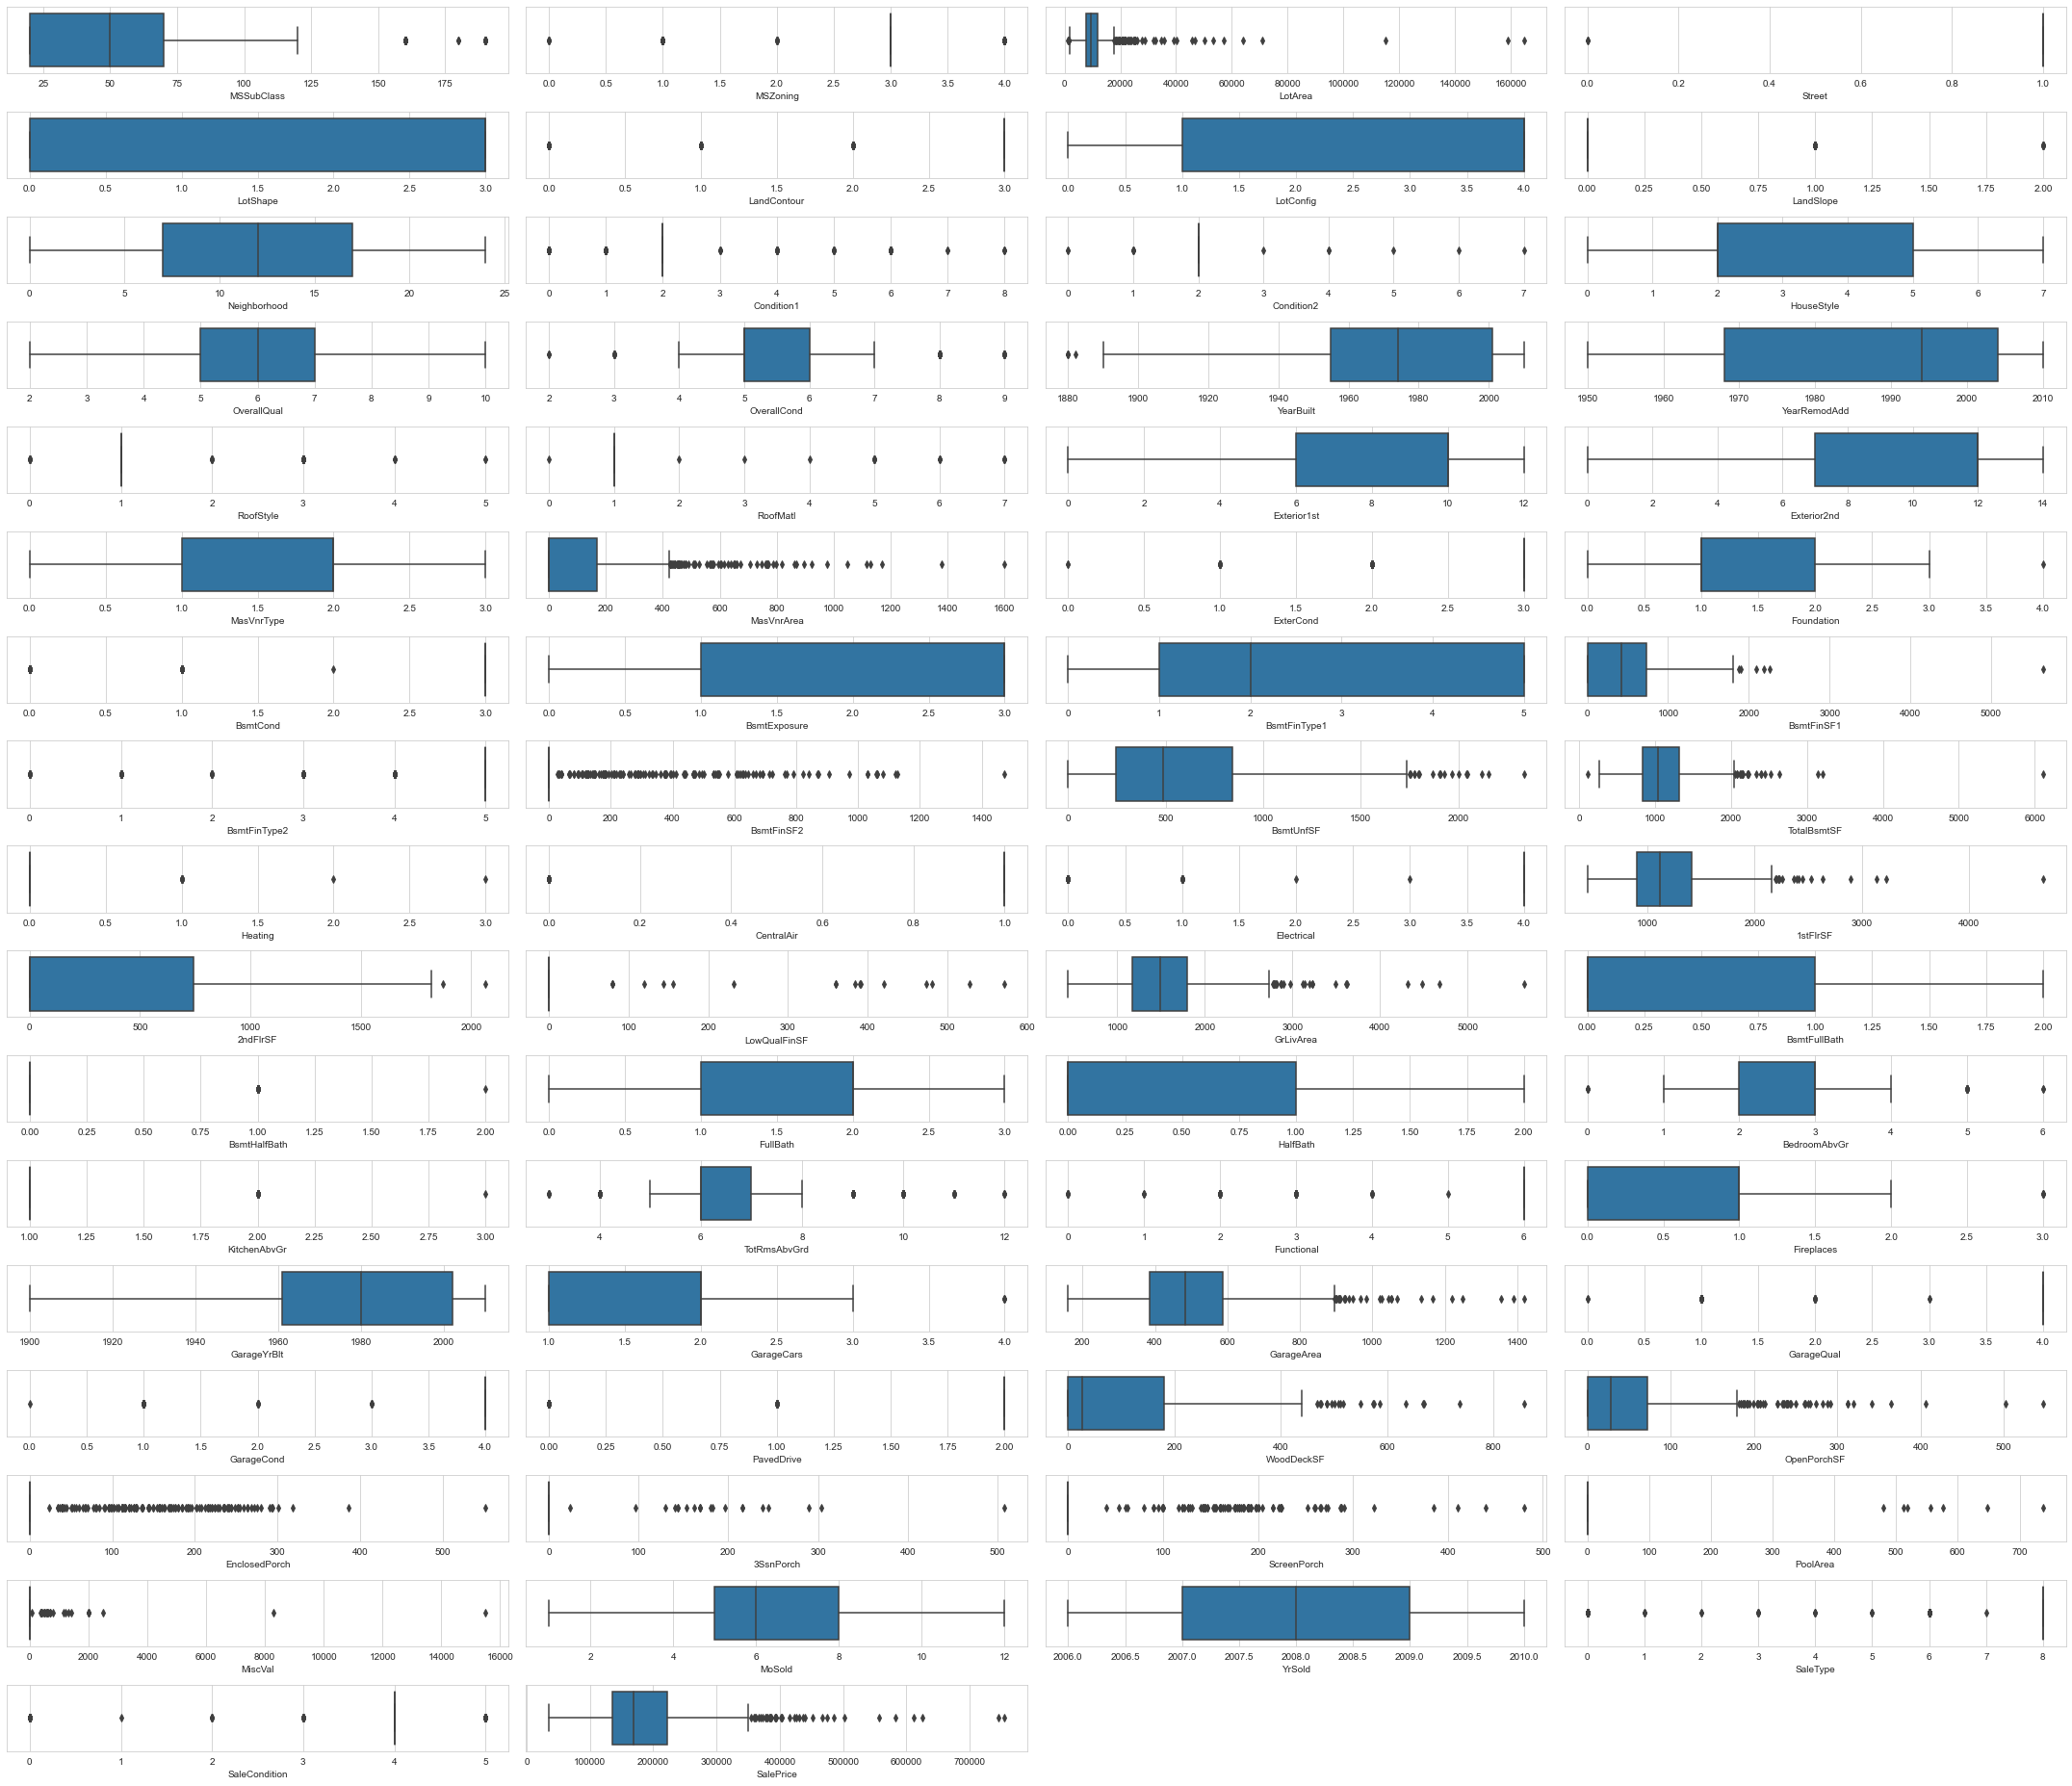

In [42]:
collist=df_train.columns.values
ncol=4
nrow=20
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df_train[collist[i]])
    plt.tight_layout()



# Treating Outliers

In [43]:
#Removing Outliers
#Z-score Techinique
from scipy.stats import zscore
z=np.abs(zscore(df_train))
z

array([[1.56866289, 0.02397747, 0.62082275, ..., 0.33346061, 0.17597532,
        0.75593447],
       [0.88037203, 0.02397747, 0.56168422, ..., 0.33346061, 0.17597532,
        1.03135956],
       [0.09924194, 0.02397747, 0.08108838, ..., 0.33346061, 0.17597532,
        1.05421139],
       ...,
       [2.54827685, 0.02397747, 0.90712416, ..., 0.33346061, 0.17597532,
        0.49422356],
       [0.34414543, 4.83895352, 0.23461859, ..., 0.33346061, 0.17597532,
        1.87937644],
       [0.09924194, 0.02397747, 0.30370719, ..., 0.33346061, 0.17597532,
        0.05122997]])

In [44]:
threshold=3
print(np.where(z>3))
df_new=df_train[(z<3).all(axis=1)]

(array([   1,    1,    1, ..., 1069, 1069, 1069], dtype=int64), array([ 7, 17, 29, ..., 33, 52, 53], dtype=int64))


In [45]:
print(df_new.shape)
print(df_train.shape)

(475, 66)
(1071, 66)


In [46]:
## Percentage Loss
loss_of_data=(1071-500)/1071*100
loss_of_data


53.31465919701214

###### Outliers Overview
    1) when we try to remove outliers it will results in loss of data around 52%. so it is not best practice to remove ouliers with high percentage loss of data.  

    2) From the document Provided we know that data is expensive and we cannot lose more than 7-8% of the data. 

    3) so proceeding without outlier removal

# Seperating target variable

In [47]:
#seperating SalePrice from other attributes
x_l=df_train.drop(["SalePrice"],axis=1)
y=df_train["SalePrice"]

In [48]:
x_l.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,120,3,4928,1,0,3,4,0,13,2,...,205,0,0,0,0,0,2,2007,8,4
1,20,3,15865,1,0,3,4,1,12,2,...,207,0,0,224,0,0,10,2007,8,4
2,60,3,9920,1,0,3,1,0,15,2,...,130,0,0,0,0,0,6,2007,8,4
3,20,3,11751,1,0,3,4,0,14,2,...,122,0,0,0,0,0,1,2010,0,4
4,20,3,16635,1,0,3,2,0,14,2,...,0,0,0,0,0,0,6,2009,8,4


In [49]:
y

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1162     58500
1163    122000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1071, dtype: int64

# Scaling Input Variable

In [50]:
# Algorithms requires all features to be on common scale. 
#using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x_l)
x


array([[ 1.56866289, -0.02397747, -0.62082275, ..., -0.60104044,
         0.33346061,  0.17597532],
       [-0.88037203, -0.02397747,  0.56168422, ..., -0.60104044,
         0.33346061,  0.17597532],
       [ 0.09924194, -0.02397747, -0.08108838, ..., -0.60104044,
         0.33346061,  0.17597532],
       ...,
       [ 2.54827685, -0.02397747, -0.90712416, ...,  0.90648722,
         0.33346061,  0.17597532],
       [ 0.34414543, -4.83895352, -0.23461859, ...,  0.15272339,
         0.33346061,  0.17597532],
       [ 0.09924194, -0.02397747, -0.30370719, ..., -1.35480427,
         0.33346061,  0.17597532]])

###### Observation:

    once the standard scaling is done we proceed with train and test split

# Preparing dataset for model training

### splitting the testing and training data

In [51]:
#importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1)

In [52]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((856, 65), (215, 65), (856,), (215,))

# Finding best model

In [53]:
#importing our model libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
lr=LinearRegression()
ls=Lasso()
rd=Ridge()
en=ElasticNet()
from sklearn.svm import SVR
svr=SVR()
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
#importing error Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [54]:
#scoring the model
model=[lr,svr,knn,ls,rd,en]
for m in model:
    m.fit(x_train,y_train)
    print("Training score of ",m,"is",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("r2_score is :",r2_score(y_test,predm))
    print("Error:")
    print("mean_absolute_error is :",mean_absolute_error(y_test,predm))
    print("mean_squared_error is :",mean_squared_error(y_test,predm))
    print("root mean_absolute_error is :",np.sqrt(mean_squared_error(y_test,predm)))
    
    print("**********************************************************")
    print("\n\n")


Training score of  LinearRegression() is 0.8189688818910674
r2_score is : 0.7479121385452302
Error:
mean_absolute_error is : 23190.5640680319
mean_squared_error is : 1751019065.4059007
root mean_absolute_error is : 41845.17971530175
**********************************************************



Training score of  SVR() is -0.05558230829811661
r2_score is : -0.04030358532528178
Error:
mean_absolute_error is : 56365.845107928246
mean_squared_error is : 7226017949.46607
root mean_absolute_error is : 85005.98772713644
**********************************************************



Training score of  KNeighborsRegressor() is 0.7745846189791241
r2_score is : 0.7394866072025716
Error:
mean_absolute_error is : 24196.477209302324
mean_squared_error is : 1809543366.9412093
root mean_absolute_error is : 42538.72784817629
**********************************************************



Training score of  Lasso() is 0.8189845078028037
r2_score is : 0.747872810724095
Error:
mean_absolute_error is : 23182.

# Ensemble Technique to boostup our score

In [55]:
#using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print("score is",rf.score(x_train,y_train))
print("r2 score is",r2_score(y_test,rf_pred))
print("mean absolute error is : ",mean_absolute_error(y_test,rf_pred))
print("mean squared error is : ",mean_squared_error(y_test,rf_pred))
print("root mean absolute error is : ",np.sqrt(mean_absolute_error(y_test,rf_pred)))


score is 0.9726250532151752
r2 score is 0.8453832768942584
mean absolute error is :  17121.029348837208
mean squared error is :  1073978050.4556935
root mean absolute error is :  130.84735132526455


In [56]:
#using AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
rf=RandomForestRegressor()
ada=AdaBoostRegressor(base_estimator=rf,n_estimators=20,learning_rate=0.1,random_state=1)
ada.fit(x_train,y_train)
ada_pred=ada.predict(x_test)
ada_score=ada.score(x_train,y_train)
print("score is",ada_score)
print("r2 score is",r2_score(y_test,ada_pred))
print("mean absolute error is : ",mean_absolute_error(y_test,ada_pred))
print("mean squared error is : ",mean_squared_error(y_test,ada_pred))
print("root mean absolute error is : ",np.sqrt(mean_absolute_error(y_test,ada_pred)))

score is 0.9862220925148403
r2 score is 0.8482077380571617
mean absolute error is :  16779.5811627907
mean squared error is :  1054359155.2133715
root mean absolute error is :  129.5360226454043


we got a decent score for both RandomForestRegressor and AdaBoostRegressor.
 - RandomForestRegressor : Train :98.6 Test :83.0
 - AdaBoostRegressor : Train :98.6 Test :84.8

In [57]:
#cross validating 
#Adaboost regressor
#cross-validating for checking upper/lower cutting
from sklearn.model_selection import cross_val_score
ada.fit(x_train,y_train)
pred_train=ada.predict(x_train)
pred_test=ada.predict(x_test)
r2_accuracy=r2_score(y_test,pred_test)
for i in range(2,5):
    cr=cross_val_score(ada,x,y,cv=i)
    cross=cr.mean()
    print("At cv : ",i,"\ncross val score is : ",cross*100,"\nr2_score is: ",r2_accuracy*100)
    print("******************************************************************************")
    print("\n\n")    

At cv :  2 
cross val score is :  81.4512891490087 
r2_score is:  84.82077380571617
******************************************************************************



At cv :  3 
cross val score is :  85.23924584285393 
r2_score is:  84.82077380571617
******************************************************************************



At cv :  4 
cross val score is :  83.90398103999192 
r2_score is:  84.82077380571617
******************************************************************************





# Hyper parameter Tuning

In [58]:
#AdaBoostRegressor
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
parameters={"n_estimators" :[1,10,100],
            "learning_rate" : [0.15,0.1,0.05,0.01],
            "loss" : ['linear', 'square', 'exponential']}
ada=AdaBoostRegressor()
clf=GridSearchCV(ada,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 0.15, 'loss': 'exponential', 'n_estimators': 100}


# Final Accuracy

In [59]:
from sklearn.ensemble import AdaBoostRegressor
rf=RandomForestRegressor()
ada=AdaBoostRegressor(base_estimator=rf,n_estimators=100,learning_rate=0.15,random_state=1,loss="exponential")
ada.fit(x_train,y_train)
ada_pred=ada.predict(x_test)
ada_score=ada.score(x_train,y_train)
print("final training score is",ada_score*100)
print("final testing is",r2_score(y_test,ada_pred)*100)


final training score is 99.48974650340715
final testing is 85.55820173733075


Text(0, 0.5, 'ada_pred')

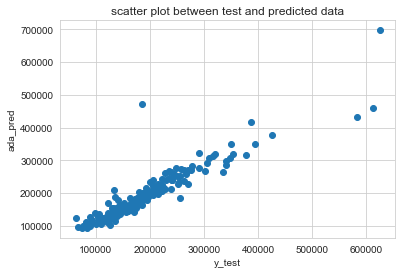

In [60]:
#plotting scatter plot between training and predicted data for adaboost Regression
plt.scatter(y_test,ada_pred)
plt.title("scatter plot between test and predicted data")
plt.xlabel("y_test")
plt.ylabel("ada_pred")


In [61]:
import numpy as np
a=np.array(y_test)
predicted=np.array(ada.predict(x_test))
df_con=pd.DataFrame({"original":a,"Predicted":predicted})
df_con.head(10)

,original,Predicted
0,222500,223941.10
1,110000,123363.66
2,129000,126193.65
3,129500,152995.84
4,175000,180489.64
5,132000,126979.61
6,140000,145591.75
7,123000,130887.18
8,256000,184001.00
9,302000,265715.88


# SAVING MODEL

In [62]:
import pickle
filename="Housing Price prediction.pkl"
pickle.dump(ada,open(filename,"wb"))

# USING THE TEST DATASET

In [63]:
#loading test data
df_test= pd.read_csv('housing test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [64]:
print(df_test.shape)
print(df_test.info())
print(df_test.dtypes)
print(df_test.columns)

(292, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_test['MSZoning'] = le.fit_transform(df_test['MSZoning'])
df_test['Street'] = le.fit_transform(df_test['Street'])
df_test['LotShape'] = le.fit_transform(df_test['LotShape'])
df_test['LandContour'] = le.fit_transform(df_test['LandContour'])
df_test['LotConfig'] = le.fit_transform(df_test['LotConfig'])
df_test['LandSlope'] = le.fit_transform(df_test['LandSlope'])
df_test['Neighborhood'] = le.fit_transform(df_test['Neighborhood'])
df_test['Condition1'] = le.fit_transform(df_test['Condition1'])
df_test['Condition2'] = le.fit_transform(df_test['Condition2'])
df_test['BldgType'] = le.fit_transform(df_test['BldgType'])
df_test['HouseStyle'] = le.fit_transform(df_test['HouseStyle'])
df_test['RoofStyle'] = le.fit_transform(df_test['RoofStyle'])
df_test['RoofMatl'] = le.fit_transform(df_test['RoofMatl'])
df_test['Exterior1st'] = le.fit_transform(df_test['Exterior1st'])
df_test['MasVnrType'] = le.fit_transform(df_test['MasVnrType'])
df_test['ExterQual'] = le.fit_transform(df_test['ExterQual'])
df_test['ExterCond'] = le.fit_transform(df_test['ExterCond'])
df_test['Foundation'] = le.fit_transform(df_test['Foundation'])
df_test['BsmtQual'] = le.fit_transform(df_test['BsmtQual'])
df_test['BsmtCond'] = le.fit_transform(df_test['BsmtCond'])
df_test['BsmtExposure'] = le.fit_transform(df_test['BsmtExposure'])
df_test['BsmtFinType1'] = le.fit_transform(df_test['BsmtFinType1'])
df_test['BsmtFinType2'] = le.fit_transform(df_test['BsmtFinType2'])
df_test['Heating'] = le.fit_transform(df_test['Heating'])
df_test['HeatingQC'] = le.fit_transform(df_test['HeatingQC'])
df_test['CentralAir'] = le.fit_transform(df_test['CentralAir'])
df_test['Electrical'] = le.fit_transform(df_test['Electrical'])
df_test['KitchenQual'] = le.fit_transform(df_test['KitchenQual'])
df_test['Functional'] = le.fit_transform(df_test['Functional'])
df_test['GarageType'] = le.fit_transform(df_test['GarageType'])
df_test['GarageFinish'] = le.fit_transform(df_test['GarageFinish'])
df_test['GarageQual'] = le.fit_transform(df_test['GarageQual'])
df_test['GarageCond'] = le.fit_transform(df_test['GarageCond'])
df_test['PavedDrive'] = le.fit_transform(df_test['PavedDrive'])
df_test['SaleType'] = le.fit_transform(df_test['SaleType'])
df_test['SaleCondition'] = le.fit_transform(df_test['SaleCondition'])
df_test["Exterior2nd"] = le.fit_transform(df_test['Exterior2nd'])

# Checking missing values in test dataset

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64


<AxesSubplot:>

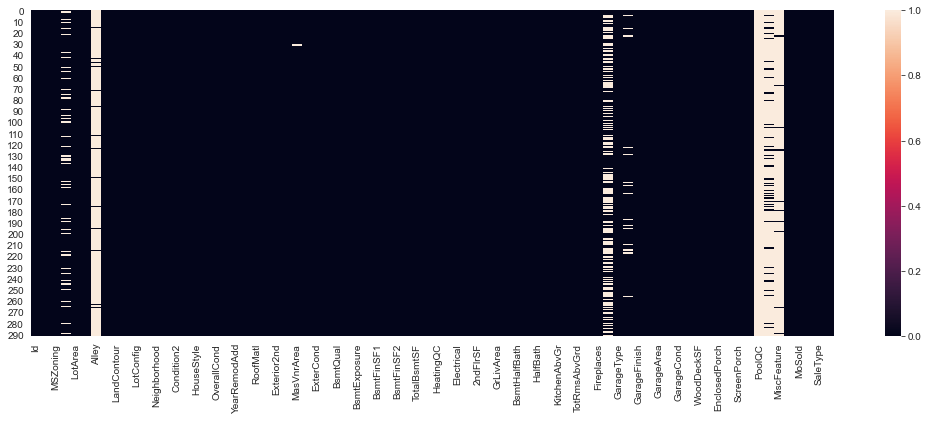

In [66]:
print(df_test.isnull().sum())

#Graphical Visuvalization of Missing values
plt.figure(figsize=(18,6))
sns.heatmap(df_test.isnull())

In [67]:
df_test.drop(columns=["Alley","FireplaceQu","PoolQC","Fence","MiscFeature","LotFrontage","Utilities",
                      "BldgType",'ExterQual',"BsmtQual","HeatingQC","KitchenQual","GarageType","GarageFinish","Id"],inplace=True)

In [68]:
# Dropping missing values from other columns
df_test.dropna(axis="rows",inplace=True)

<AxesSubplot:>

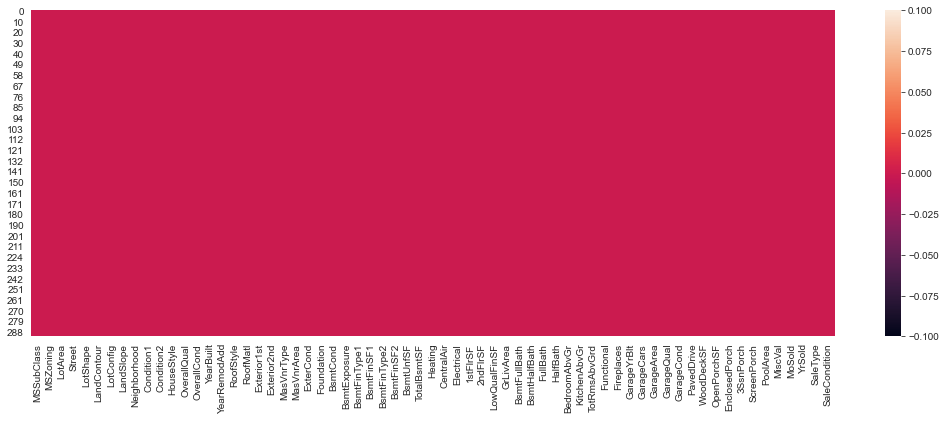

In [69]:
#Graphical Visuvalization of Missing values
plt.figure(figsize=(18,6))
sns.heatmap(df_test.isnull())

In [70]:
df_test.shape

(274, 65)

In [71]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 291
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     274 non-null    int64  
 1   MSZoning       274 non-null    int32  
 2   LotArea        274 non-null    int64  
 3   Street         274 non-null    int32  
 4   LotShape       274 non-null    int32  
 5   LandContour    274 non-null    int32  
 6   LotConfig      274 non-null    int32  
 7   LandSlope      274 non-null    int32  
 8   Neighborhood   274 non-null    int32  
 9   Condition1     274 non-null    int32  
 10  Condition2     274 non-null    int32  
 11  HouseStyle     274 non-null    int32  
 12  OverallQual    274 non-null    int64  
 13  OverallCond    274 non-null    int64  
 14  YearBuilt      274 non-null    int64  
 15  YearRemodAdd   274 non-null    int64  
 16  RoofStyle      274 non-null    int32  
 17  RoofMatl       274 non-null    int32  
 18  Exterior1s

# Predicting over Test Data

In [72]:
fitted_model=pickle.load(open("Housing Price prediction.pkl","rb"))
fitted_model

AdaBoostRegressor(base_estimator=RandomForestRegressor(), learning_rate=0.15,
                  loss='exponential', n_estimators=100, random_state=1)

In [73]:
# Loading the Model
prediction=fitted_model.predict(df_test)
prediction

array([472743.33, 441219.07, 463219.88, 691417.93, 714792.79, 445978.28,
       471495.55, 469610.37, 466251.46, 439543.44, 443555.  , 438298.13,
       447224.21, 470787.15, 691325.38, 440860.85, 721132.92, 718152.43,
       691417.93, 443864.03, 464180.11, 443483.06, 443172.81, 712829.48,
       447749.01, 721232.92, 440993.21, 697442.43, 468389.59, 446235.81,
       438737.27, 712940.29, 720365.86, 723315.36, 691528.74, 717952.46,
       442349.62, 721132.92, 713029.48, 466165.88, 442236.4 , 691130.92,
       439351.7 , 439282.78, 473443.33, 473443.33, 715882.93, 466513.66,
       689834.63, 439512.78, 716034.07, 432863.17, 712692.29, 712829.48,
       433297.24, 474311.07, 693728.74, 722014.78, 443682.34, 444693.57,
       473621.54, 693917.93, 442466.24, 467030.33, 442394.64, 445153.21,
       721232.92, 445178.63, 689834.63, 722485.72, 445492.75, 718266.14,
       723879.05, 440575.19, 466526.75, 445000.31, 713029.48, 690809.57,
       464300.91, 445112.72, 715640.29, 718152.43, 

In [74]:
output=pd.DataFrame({"sale price":prediction})
output.head()

,sale price
0,472743.33
1,441219.07
2,463219.88
3,691417.93
4,714792.79


# Conclusion

- We have managed out how to prepare a model that gives users for a novel best approach with take a gander at future lodging value predictions. 
- A few relapse strategies have been investigated Furthermore compared, when arriving during a prediction strategy In light of **AdaBoost** support. 
- Straight former imply works bring been utilized within our model, something like that that future value predictions will have a tendency towards All the more sensible values. 
- We concocted an approach with use similarly as considerably information as time permits for our prediction system, by adopting those ideas from claiming gradient boosting.